In [7]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')

dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([    
    Dense(32, activation='relu', input_shape=(10,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid'),])

model.compile(
    optimizer='sgd',              
    loss='binary_crossentropy',              
    metrics=['accuracy'])

hist = model.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 170us/step - loss: 0.6845 - accuracy: 0.5333 - val_loss: 0.6890 - val_accuracy: 0.4977
Epoch 2/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6785 - accuracy: 0.5489 - val_loss: 0.6837 - val_accuracy: 0.5160
Epoch 3/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6726 - accuracy: 0.5626 - val_loss: 0.6785 - val_accuracy: 0.5342
Epoch 4/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6667 - accuracy: 0.5920 - val_loss: 0.6730 - val_accuracy: 0.5662
Epoch 5/100
1022/1022 [==============================] - 0s 28us/step - loss: 0.6606 - accuracy: 0.6194 - val_loss: 0.6670 - val_accuracy: 0.5708
Epoch 6/100
1022/1022 [==============================] - 0s 27us/step - loss: 0.6542 - accuracy: 0.6429 - val_loss: 0.6606 - val_accuracy: 0.5890
Epoch 7/100
1022/1022 [==============================] - 0s 27us/step - loss

In [9]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 32us/step


0.8767123222351074

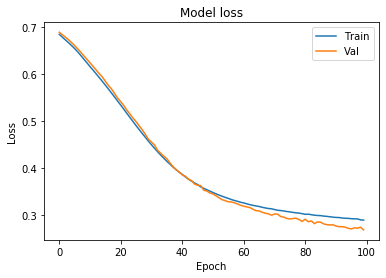

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


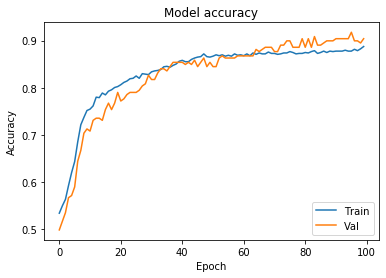

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [12]:
model_2 = Sequential([    Dense(1000, activation='relu', input_shape=(10,)),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1, activation='sigmoid'),])
model_2.compile(optimizer='adam',              loss='binary_crossentropy',              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 789us/step - loss: 0.4933 - accuracy: 0.7564 - val_loss: 0.4123 - val_accuracy: 0.8082
Epoch 2/100
1022/1022 [==============================] - 1s 512us/step - loss: 0.3614 - accuracy: 0.8552 - val_loss: 0.3699 - val_accuracy: 0.8676
Epoch 3/100
1022/1022 [==============================] - 1s 510us/step - loss: 0.3165 - accuracy: 0.8738 - val_loss: 0.3075 - val_accuracy: 0.8858
Epoch 4/100
1022/1022 [==============================] - 1s 516us/step - loss: 0.3040 - accuracy: 0.8777 - val_loss: 0.3376 - val_accuracy: 0.8493
Epoch 5/100
1022/1022 [==============================] - 1s 517us/step - loss: 0.2848 - accuracy: 0.8943 - val_loss: 0.2832 - val_accuracy: 0.8904
Epoch 6/100
1022/1022 [==============================] - 1s 506us/step - loss: 0.2892 - accuracy: 0.8845 - val_loss: 0.2915 - val_accuracy: 0.8721
Epoch 7/100
1022/1022 [==============================] - 1s 515us/step 

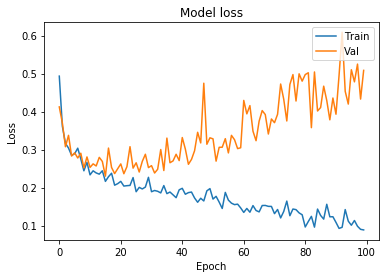

In [13]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

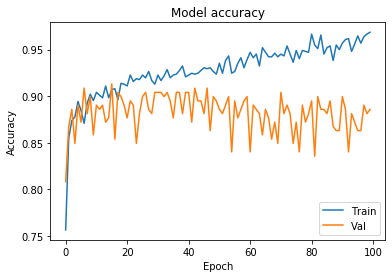

In [14]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 14.3058 - accuracy: 0.6243 - val_loss: 3.9408 - val_accuracy: 0.6986
Epoch 2/100
1022/1022 [==============================] - 1s 702us/step - loss: 1.6905 - accuracy: 0.8121 - val_loss: 0.6608 - val_accuracy: 0.8584
Epoch 3/100
1022/1022 [==============================] - 1s 737us/step - loss: 0.5803 - accuracy: 0.8601 - val_loss: 0.6607 - val_accuracy: 0.7763
Epoch 4/100
1022/1022 [==============================] - 1s 746us/step - loss: 0.5247 - accuracy: 0.8591 - val_loss: 0.4680 - val_accuracy: 0.8950
Epoch 5/100
1022/1022 [==============================] - 1s 724us/step - loss: 0.4952 - accuracy: 0.8748 - val_loss: 0.4847 - val_accuracy: 0.8539
Epoch 6/100
1022/1022 [==============================] - 1s 781us/step - loss: 0.5067 - accuracy: 0.8581 - val_loss: 0.4531 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 1s 798us/step -

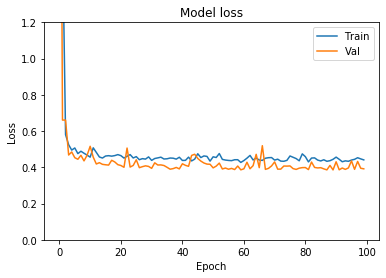

In [16]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

model_3.compile(
    optimizer='adam',              
    loss='binary_crossentropy',              
    metrics=['accuracy'])

hist_3 = model_3.fit(
    X_train, Y_train,          
    batch_size=32, epochs=100,          
    validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

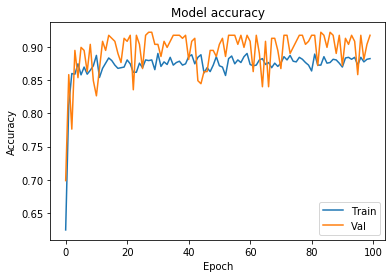

In [18]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()